In [28]:
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv("BigMart-Training-Data-refine.csv")

In [30]:
print(df.head())

   Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0         9.30          Low_Fat         0.016047                  Dairy   
1         5.92          Regular         0.019278            Soft Drinks   
2        17.50          Low_Fat         0.016760                   Meat   
3        19.20          Regular         0.000000  Fruits and Vegetables   
4         8.93          Low_Fat         0.000000              Household   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  249.8092                49                     1999.0      Medium   
1   48.2692            OUT018                     2009.0      Medium   
2  141.6180                49                     1999.0      Medium   
3  182.0950                10                     1998.0         NaN   
4   53.8614                13                     1987.0        High   

   Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0                     1  Supermarket Type1          

In [31]:
null_entries = len(df[df.isnull().any(axis=1)])
total_entries = len(df)
print("Total: {}\nNull: {}\n% Nulls: {}\n\n".format(total_entries,null_entries,round(100*null_entries/total_entries,2)))

print("With these many Nulls, we have to consider doing something because it's too many to ignore\n")

for col in df.columns.values:
    null_entries = len(df[df[col].isnull()])
    col_entries = len(df[col])
    print("{}:\n% Nulls: {}\n\n".format(col,100*round(null_entries/col_entries,2)))


print("Based on this we will need to see the impact of each feature on the target\n and potentially consider just dropping some of these features")

Total: 8523
Null: 3873
% Nulls: 45.44


With these many Nulls, we have to consider doing something because it's too many to ignore

Item_Weight:
% Nulls: 17.0


Item_Fat_Content:
% Nulls: 0.0


Item_Visibility:
% Nulls: 0.0


Item_Type:
% Nulls: 0.0


Item_MRP:
% Nulls: 0.0


Outlet_Identifier:
% Nulls: 0.0


Outlet_Establishment_Year:
% Nulls: 17.0


Outlet_Size:
% Nulls: 28.000000000000004


Outlet_Location_Type:
% Nulls: 0.0


Outlet_Type:
% Nulls: 0.0


Item_Outlet_Sales:
% Nulls: 0.0


Based on this we will need to see the impact of each feature on the target
 and potentially consider just dropping some of these features


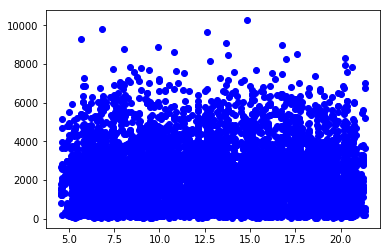

Item_Weight doesn't show a clear correlation with sales so it
may be worth dropping as a feature


In [32]:
plt.plot(df["Item_Weight"],df["Item_Outlet_Sales"],"bo")
plt.show()

print("Item_Weight doesn't show a clear correlation with sales so it\nmay be worth dropping as a feature")

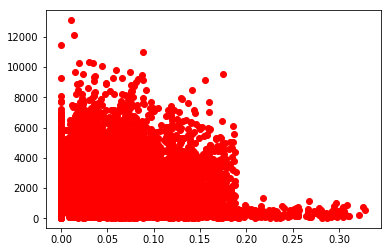

Item Visibility shows us something interesting
 Perhaps more visible items may be more expensive or correspond to specialty
 products that need to be shown off to drive the limited sale? 
This is something interesting to note that will have a good imapct on the mdoel


In [33]:
plt.plot(df["Item_Visibility"],df["Item_Outlet_Sales"],"ro")
plt.show()

print("Item Visibility shows us something interesting\n Perhaps more visible items may be more expensive or correspond to specialty\n products that need to be shown off to drive the limited sale? \nThis is something interesting to note that will have a good imapct on the mdoel")

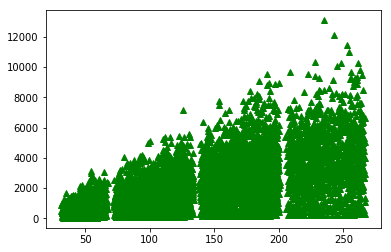

We can see some clustering around particular price ranges so it may be easier
 to capture the influence by remodeling this as a categorical variable


In [34]:
plt.plot(df["Item_MRP"],df["Item_Outlet_Sales"],"g^")
plt.show()

print("We can see some clustering around particular price ranges so it may be easier\n to capture the influence by remodeling this as a categorical variable")

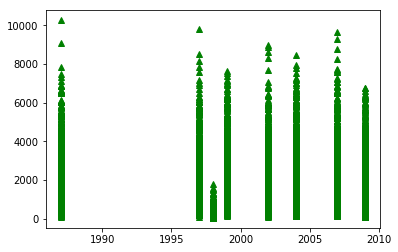

We can see some clustering again, but there seems to be no strong trends
 The outlier year around 1998 could be just a random surge in store openings to economic growth?


In [35]:
plt.plot(df["Outlet_Establishment_Year"],df["Item_Outlet_Sales"],"g^")
plt.show()

print("We can see some clustering again, but there seems to be no strong trends\n The outlier year around 1998 could be just a random surge in store openings to economic growth?")

{'Item_Fat_Content': {'Regular': 0, 'Low_Fat': 1}}


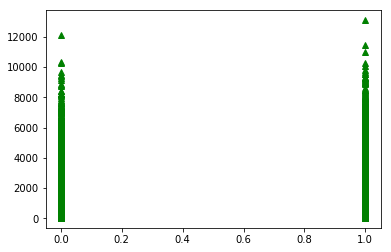

Low Fat Mean: 2157.71, Regular Mean: 2224.56

These averages are very similar so it doesnt seem that
 fat_content has a strong impact on outlet_sales


In [36]:
fat_mapping = {}
i = 0
for val in set(df["Item_Fat_Content"].values):
    fat_mapping[val] = i
    i = i+1
mapping = {"Item_Fat_Content": fat_mapping}
fat_df = df.replace(fat_mapping)

print(mapping)
plt.plot(fat_df["Item_Fat_Content"],fat_df["Item_Outlet_Sales"],'g^')
plt.show()

lf_vals = (fat_df[fat_df["Item_Fat_Content"] == 1]["Item_Outlet_Sales"])
lf_mean = round(lf_vals.mean(),2)
reg_vals = (fat_df[fat_df["Item_Fat_Content"]== 0]["Item_Outlet_Sales"])
reg_mean = round((reg_vals).mean(),2)
print("Low Fat Mean: {}, Regular Mean: {}\n".format(lf_mean,reg_mean))

print("These averages are very similar so it doesnt seem that\n fat_content has a strong impact on outlet_sales")

{'Item_Type': {'Starchy Foods': 0, 'Breakfast': 1, 'Fruits and Vegetables': 2, 'Hard Drinks': 3, 'Meat': 4, 'Frozen Foods': 5, 'Baking Goods': 6, 'Breads': 7, 'Seafood': 8, 'Dairy': 9, 'Others': 10, 'Household': 11, 'Soft Drinks': 12, 'Snack Foods': 13, 'Canned': 14, 'Health and Hygiene': 15}}


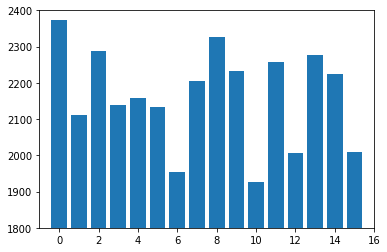


There are so many categories here, the model could get confused, but there's also
 not sufficient clustering to merit group certain categories together
 May be best to just leave this feature as is but note that it may inadvertently hurt the model

[2374.3299999999999, 2111.8099999999999, 2289.0100000000002, 2139.2199999999998, 2158.98, 2132.8699999999999, 1952.97, 2204.1300000000001, 2326.0700000000002, 2232.54, 1926.1400000000001, 2258.7800000000002, 2006.51, 2277.3200000000002, 2225.1900000000001, 2010.0]


In [50]:
type_mapping = {}
i = 0
for val in set(df["Item_Type"].values):
    type_mapping[val] = i
    i = i+1
mapping = {"Item_Type": type_mapping}
type_df = df.replace(type_mapping)

print(mapping)
import statistics

mean_list = []
for item in set(type_df["Item_Type"].values):
    arr = type_df[type_df["Item_Type"] == item]["Item_Outlet_Sales"]
    mean = statistics.mean(arr)
    mean_list.append(round(mean,2))
    
plt.bar(list(set(type_df["Item_Type"].values)),mean_list,align='center')
plt.axis([-1,16,1800,2400])
plt.show()

print()

print("There are so many categories here, the model could get confused, but there's also\n not sufficient clustering to merit group certain categories together\n May be best to just leave this feature as is but note that it may inadvertently hurt the model")

new_cat_1 = [0,8,2]
new_cat_2
new_cat_3

In [ ]:
print("Outlet_Identifier isn't worth looking into\nAlso I don't believe it would provide any meaningful information")

In [ ]:
size_mapping = {}
i = 0
for val in set(df["Outlet_Size"].values):
    size_mapping[val] = i
    i = i+1
mapping = {"Outlet_Size": size_mapping}
size_df = df.replace(mapping)

print(mapping)
plt.plot(size_df["Outlet_Size"],size_df["Item_Outlet_Sales"],'go')
plt.show()

print(size_df["Outlet_Size"].value_counts())
print()

for val in list(range(0,len(set(df["Outlet_Size"].values)))):
    cur_vals = (size_df[size_df["Outlet_Size"] == val])["Item_Outlet_Sales"]
    cur_mean = round(cur_vals.mean(),2)
    print("{} Mean: {}\n".format(val,cur_mean))

print("The visualization doesn't show too stark of a difference due to outliers,\n but the means do show reasonable variation (ignoring the nan values)")
print("These nan values will have to be handled by filling in values, possibly ranodmly?")
print("The trend seems too significant to throw away the column and there's too many rows to throw away all the rows")
print("We'll need to think about this one")

In [ ]:
#No mapping needed on this one bc category values are already numeric
location_df = df

plt.plot(location_df["Outlet_Location_Type"],location_df["Item_Outlet_Sales"],'go')
plt.show()

print(location_df["Outlet_Location_Type"].value_counts())
print()

for val in set(df["Outlet_Location_Type"].values):
    cur_vals = (location_df[location_df["Outlet_Location_Type"] == val])["Item_Outlet_Sales"]
    cur_mean = round(cur_vals.mean(),2)
    print("{} Mean: {}\n".format(val,cur_mean))
    
print("Location type 1 seems to have a mean significantly different from the other two \n but 2 and 3 seems very similar ignoring certain outlier values")
print("May be worth combining location types 2 and 3 since they're means are significantly different\n but this is something to be tried later on")

In [ ]:
type_mapping = {}
i = 0
for val in set(df["Outlet_Type"].values):
    type_mapping[val] = i
    i = i+1
mapping = {"Outlet_Type": type_mapping}
type_df = df.replace(mapping)

print(mapping)
plt.plot(type_df["Outlet_Type"],type_df["Item_Outlet_Sales"],'go')
plt.show()

print(type_df["Outlet_Type"].value_counts())
print()

for val in list(range(0,len(set(df["Outlet_Type"].values)))):
    cur_vals = (type_df[type_df["Outlet_Type"] == val])["Item_Outlet_Sales"]
    cur_mean = round(cur_vals.mean(),2)
    print("{} Mean: {}\n".format(val,cur_mean))

print("There is def. a clear imapct here. \n This variable shows possibly the most significant impact compared to any other features")

In [ ]:
print(set(df["Outlet_Identifier"].values))

{'46', '13', '45', 'OUT019', '35', '10', '49', '17', 'OUT018', 'OUT027'}


<Container object of 8523 artists>

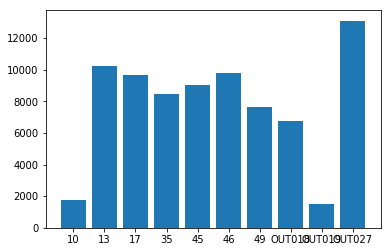

In [29]:
# Bar chart for Item_Outlet_Sales vs. Outlet_Identifier

print(set(df["Outlet_Identifier"]))
plt.bar(df["Outlet_Identifier"], df["Item_Outlet_Sales"], align="center")

{'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3', 'Grocery Store'}


<Container object of 8523 artists>

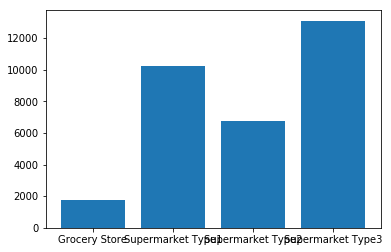

In [30]:
# Bar chart for Item_Outlet_Sales vs. Outlet_Type

print(set(df["Outlet_Type"]))
plt.bar(df["Outlet_Type"], df["Item_Outlet_Sales"], align="center")